<a href="https://colab.research.google.com/github/Swetha-ai-dotcom/Apple-count/blob/main/Youngbucks_Apple_Pest_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step1 : Imports

In [1]:
#Required Imports
import os
import pandas as pd
import glob as gb
import tensorflow as tf
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
from google.colab import files
from tensorflow.keras.utils import load_img, img_to_array

Step2 : Data Loading and Exploration

In [2]:
TRAINING_DIR = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Apple-Disease-Detection/data/Train"
TEST_DIR = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/Apple-Disease-Detection/data/Test"
BATCH_SIZE=64

Step 3 : Reading Images

In [3]:
from google.colab import drive
drive.mount('/content/drive')


import os
import glob as gb


# Define the correct path to the training directory in Google Drive
TRAINING_DIR = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Apple-Disease-Detection/data/Train'


# Check if the TRAINING_DIR exists
if os.path.exists(TRAINING_DIR):
    # Loop through each folder inside the "Train" directory
    for folder in os.listdir(TRAINING_DIR):
        # Get the path for images in each folder (assuming images are .jpg)
        files = gb.glob(os.path.join(TRAINING_DIR, folder, '*.jpg'))
        print(f'For training data, found {len(files)} images in folder {folder}')
else:
    print("Directory not found, please check the path.")


# Check if the TEST_DIR exists

for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')


Mounted at /content/drive
For training data, found 114 images in folder Rot_Apple__Grading_C__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Moderate
For training data, found 82 images in folder Scab_Apple__Grading_D__Pest_Disease_Affected_Yes__Recommended_Pesticide_Dithane_M45__Damage_Severity_High
For training data, found 116 images in folder Blotch_Apple__Grading_B__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Less
For training data, found 65 images in folder Healthy_Apple__Grading_A__Pest_Disease_Affected_No__Recommended_Pesticide_no need__Damage_Severity_Nil
For testing data, found 29 in folder Scab_Apple__Grading_D__Pest_Disease_Affected_Yes__Recommended_Pesticide_Dithane_M45__Damage_Severity_High
For testing data, found 38 in folder Rot_Apple__Grading_C__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Moderate
For testing data, found 30 in folder Blotch_Apple__Grading_B__Pest_Disease_Affected_Ye

Step 4 : Visualize Random Images

In [4]:
def view_random_image(target_dir, target_class):


    target_folder = target_dir + target_class




    random_image = random.sample(os.listdir(target_folder),1)




    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")


    return img


In [5]:
class_names = [
    'Rot_Apple__Grading_C__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Moderate',
    'Scab_Apple__Grading_D__Pest_Disease_Affected_Yes__Recommended_Pesticide_Dithane_M45__Damage_Severity_High',
    'Blotch_Apple__Grading_B__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Less',
    'Healthy_Apple__Grading_A__Pest_Disease_Affected_No__Recommended_Pesticide_no need__Damage_Severity_Nil'
]


Image shape (183, 275, 3)
Image shape (213, 237, 3)
Image shape (228, 221, 3)
Image shape (194, 259, 3)
Image shape (244, 206, 3)
Image shape (100, 100, 3)


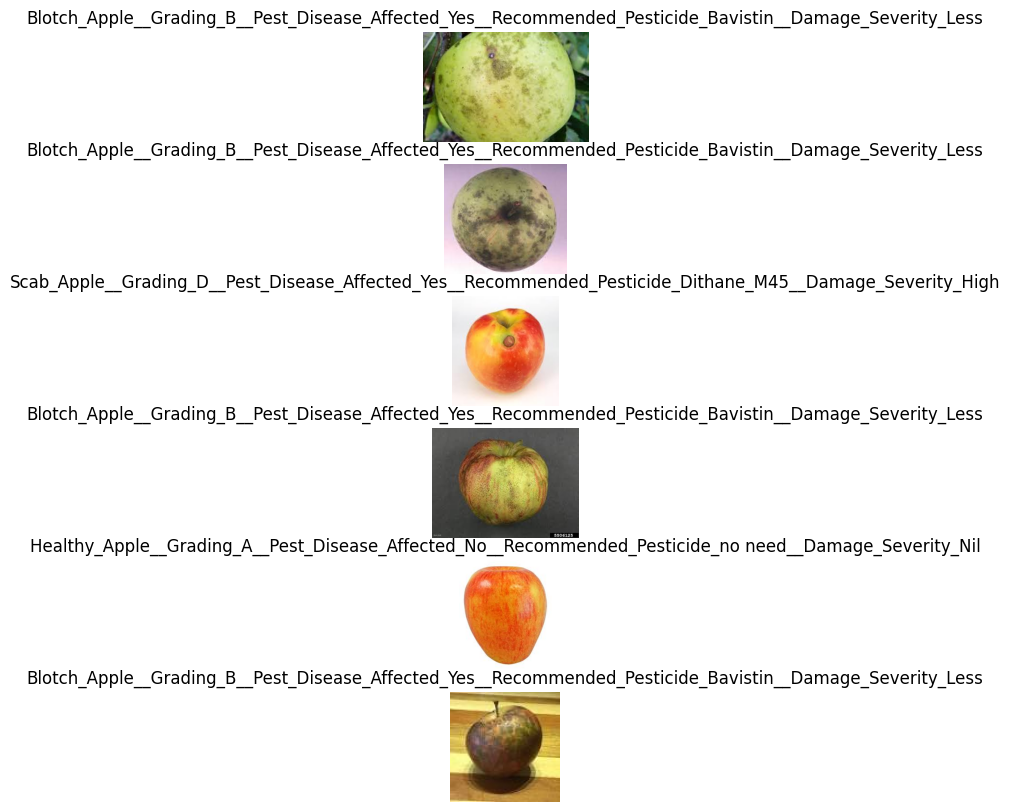

In [6]:
plt.figure(figsize=(20,10))
for i in range(6):
    plt.subplot(6, 1, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir=TRAINING_DIR+"/", target_class=class_name)


Step 5 : Data Augmentation

In [7]:
def train_val_generators(TRAINING_DIR, TEST_DIR):


  train_datagen = ImageDataGenerator(rescale= 1.0/255.0,
                                     rotation_range= 45,
                                     width_shift_range= 0.2,
                                     height_shift_range= 0.2,
                                     shear_range= 0.2,
                                     zoom_range= 0.2,
                                     horizontal_flip= True,
                                     fill_mode= 'nearest')




  train_generator = train_datagen.flow_from_directory(directory= TRAINING_DIR,
                                                      batch_size= 20,
                                                      class_mode= 'categorical',
                                                      target_size=(224, 224))




  validation_datagen = ImageDataGenerator( rescale = 1.0/255.0 )




  validation_generator = validation_datagen.flow_from_directory(directory= TEST_DIR,
                                                                batch_size= 20,
                                                                class_mode= 'categorical',
                                                                target_size=(224, 224))


  return train_generator, validation_generator




train_generator, test_generator = train_val_generators(TRAINING_DIR, TEST_DIR)

Found 380 images belonging to 4 classes.
Found 122 images belonging to 4 classes.


Step6 : Model Architecture

In [8]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Input

# Step 1: Model Definition
model = Sequential([
    # Explicitly define input using Input layer
    Input(shape=(224, 224, 3)),
    # First convolution
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Second convolution
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Third convolution
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Fourth convolution
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    # Flatten the results
    Flatten(),
    Dropout(0.5),
    # 512-neuron hidden layer
    Dense(512, activation='relu'),
    # Output layer with 4 classes
    Dense(4, activation='softmax')
])


Step7 : Model Compilation and Summary

In [9]:
#Model Compilation
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

# Display the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 128)       │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 24, 24, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │           2,052 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,983,044 (19.01 MB)

 Trainable params: 4,983,044 (19.01 MB)

 Non-trainable params: 0 (0.00 B)

Step8 : Model Training

In [10]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Calculate steps per epoch
steps_per_epoch = train_generator.samples // train_generator.batch_size
validation_steps = test_generator.samples // test_generator.batch_size

# Define the ModelCheckpoint callback
checkpoint = ModelCheckpoint(
    filepath='weights.best.keras',
    monitor='val_loss',  # Ensure 'val_loss' is available
    save_best_only=True,
    verbose=1
)

# Train the model
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=150,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[checkpoint]
)


Epoch 1/150


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2607 - loss: 2.1724
Epoch 1: val_loss improved from inf to 1.31516, saving model to weights.best.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 80s 3s/step - accuracy: 0.2636 - loss: 2.1478 - val_accuracy: 0.3583 - val_loss: 1.3152
Epoch 2/150


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 1.31516 to 1.16470, saving model to weights.best.keras
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 1.1647
Epoch 3/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.3607 - loss: 1.4221
Epoch 3: val_loss did not improve from 1.16470
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 234ms/step - accuracy: 0.3591 - loss: 1.4209 - val_accuracy: 0.2500 - val_loss: 1.3770
Epoch 4/150

Epoch 4: val_loss did not improve from 1.16470
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 742us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 1.8385
Epoch 5/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step - accuracy: 0.3207 - loss: 1.3736
Epoch 5: val_loss did not improve from 1.16470
19/19 ━━━━━━━━━━━━━━━━━━━━ 7s 241ms/step - accuracy: 0.3209 - loss: 1.3734 - val_accuracy: 0.3500 - val_loss: 1.3268
Epoch 6/150

Epoch 6: val_loss did not improve from 1.16470
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/s

Step 9: Training Visualization

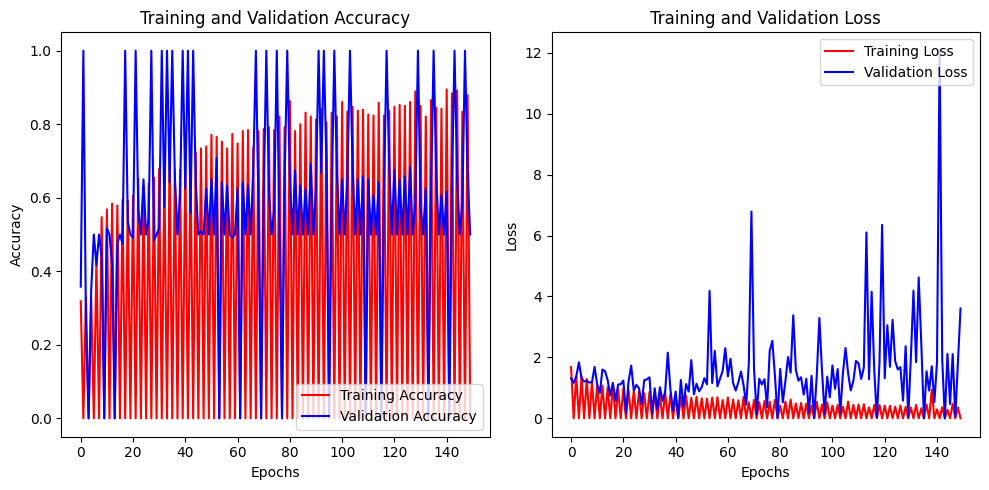

In [11]:
import matplotlib.pyplot as plt

# Access training and validation accuracy and loss from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Trim validation lists to match the length of the training lists
min_length = min(len(acc), len(val_acc))
acc = acc[:min_length]
val_acc = val_acc[:min_length]
loss = loss[:min_length]
val_loss = val_loss[:min_length]

# Now you can plot without errors
epochs = range(len(acc))

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # First plot: Accuracy
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training and validation loss
plt.subplot(1, 2, 2)  # Second plot: Loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Show the plots
plt.tight_layout()
plt.show()


Step 10: Class Indices

In [12]:
train_generator.class_indices


{'Blotch_Apple__Grading_B__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Less': 0,
 'Healthy_Apple__Grading_A__Pest_Disease_Affected_No__Recommended_Pesticide_no need__Damage_Severity_Nil': 1,
 'Rot_Apple__Grading_C__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Moderate': 2,
 'Scab_Apple__Grading_D__Pest_Disease_Affected_Yes__Recommended_Pesticide_Dithane_M45__Damage_Severity_High': 3}

In [13]:
# Save the model in the native Keras format (.keras)
model.save('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Apple-Disease-Detection/final_model.keras')

Step 11:Prediction

Processing folder: Rot_Apple__Grading_C__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Moderate
Processing image: 13.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for 13.jpg: [[0. 0. 1. 0.]]


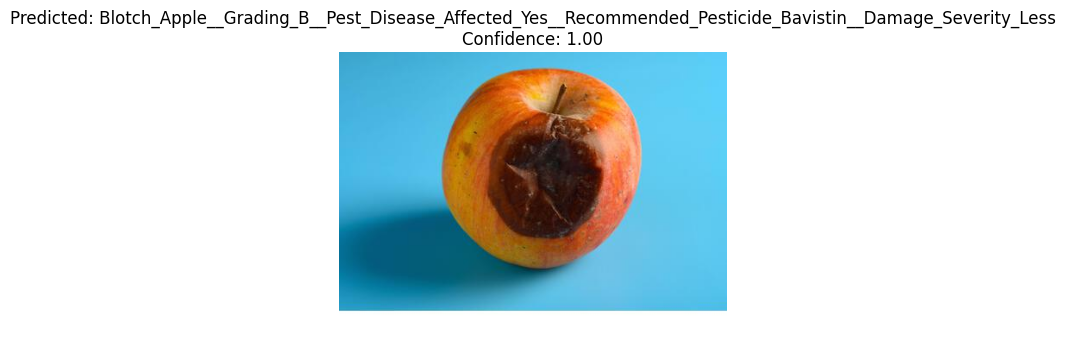

Image: 13.jpg, Predicted class: Blotch_Apple__Grading_B__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Less, Confidence: 1.00
Processing image: 61.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predictions for 61.jpg: [[0. 0. 1. 0.]]


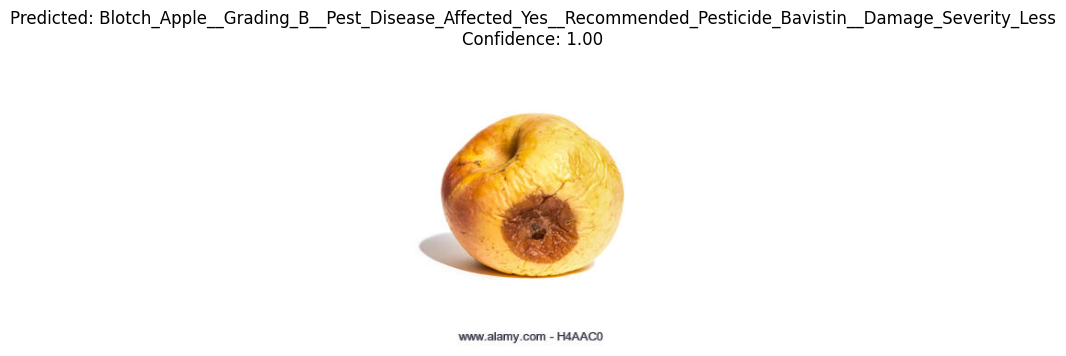

Image: 61.jpg, Predicted class: Blotch_Apple__Grading_B__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Less, Confidence: 1.00
Processing image: 91.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions for 91.jpg: [[0. 0. 1. 0.]]


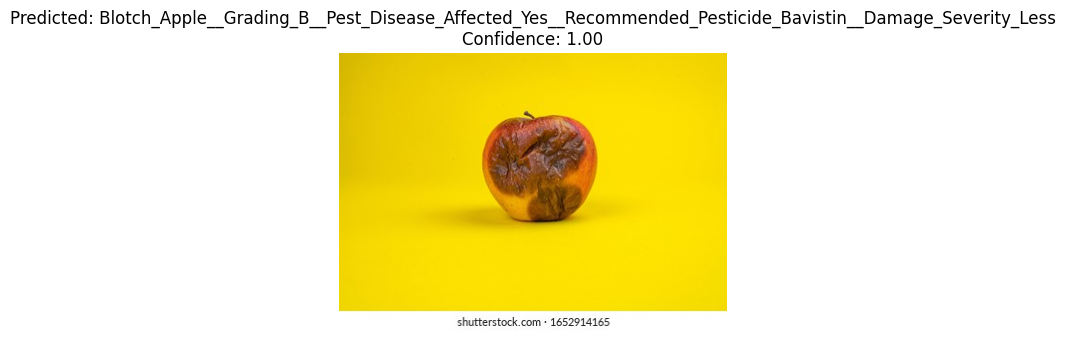

Image: 91.jpg, Predicted class: Blotch_Apple__Grading_B__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Less, Confidence: 1.00
Processing image: 63.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predictions for 63.jpg: [[0. 0. 1. 0.]]


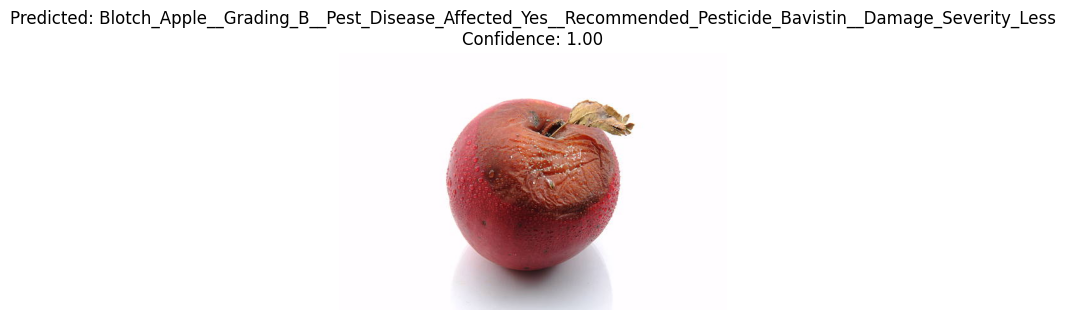

Image: 63.jpg, Predicted class: Blotch_Apple__Grading_B__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Less, Confidence: 1.00
Processing image: 16.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predictions for 16.jpg: [[0. 1. 0. 0.]]


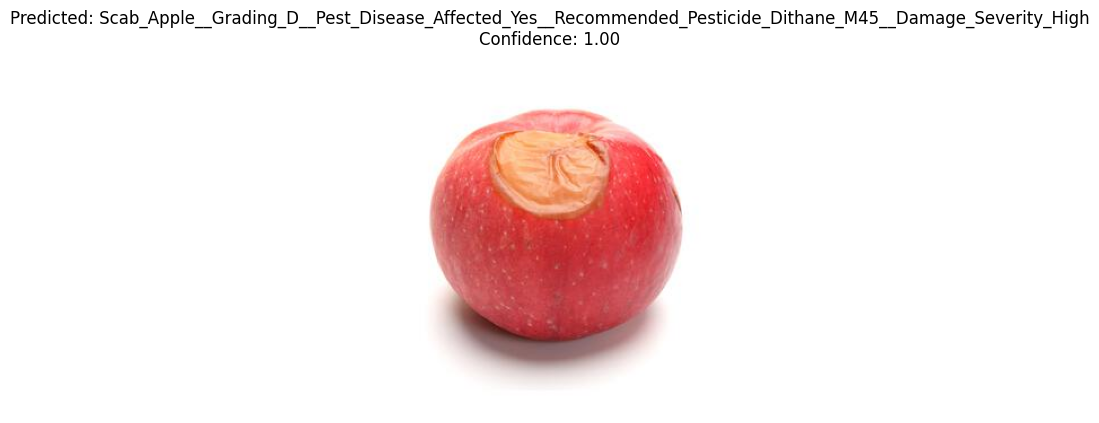

Image: 16.jpg, Predicted class: Scab_Apple__Grading_D__Pest_Disease_Affected_Yes__Recommended_Pesticide_Dithane_M45__Damage_Severity_High, Confidence: 1.00
Processing image: 112.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predictions for 112.jpg: [[0. 0. 1. 0.]]


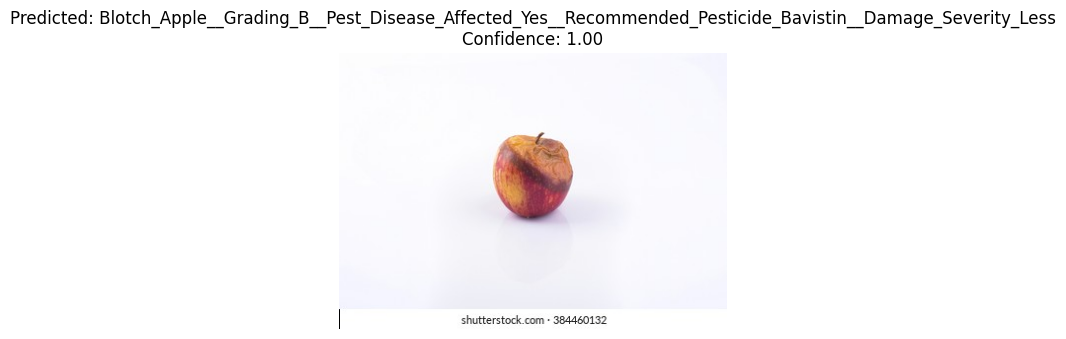

Image: 112.jpg, Predicted class: Blotch_Apple__Grading_B__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Less, Confidence: 1.00
Processing image: 94.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predictions for 94.jpg: [[0. 0. 1. 0.]]


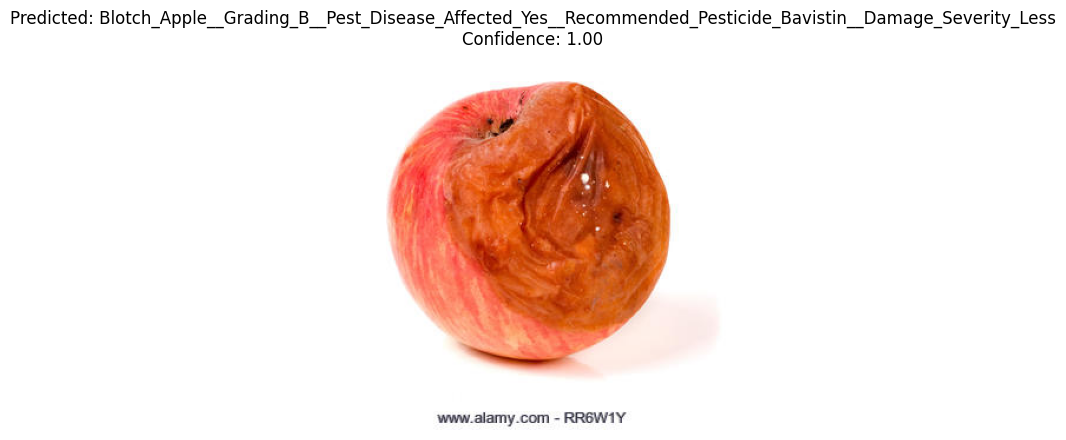

Image: 94.jpg, Predicted class: Blotch_Apple__Grading_B__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Less, Confidence: 1.00
Processing image: 51.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predictions for 51.jpg: [[0. 0. 1. 0.]]


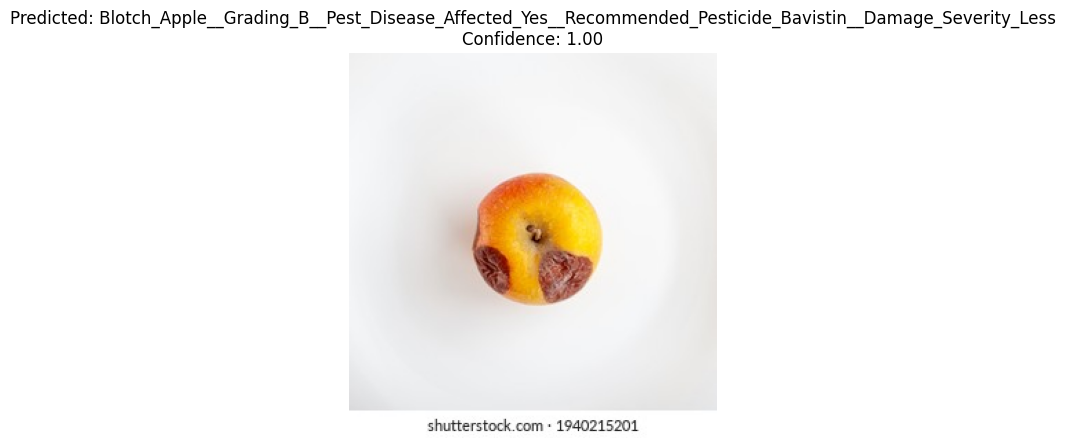

Image: 51.jpg, Predicted class: Blotch_Apple__Grading_B__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Less, Confidence: 1.00
Processing image: 80.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predictions for 80.jpg: [[0. 0. 1. 0.]]


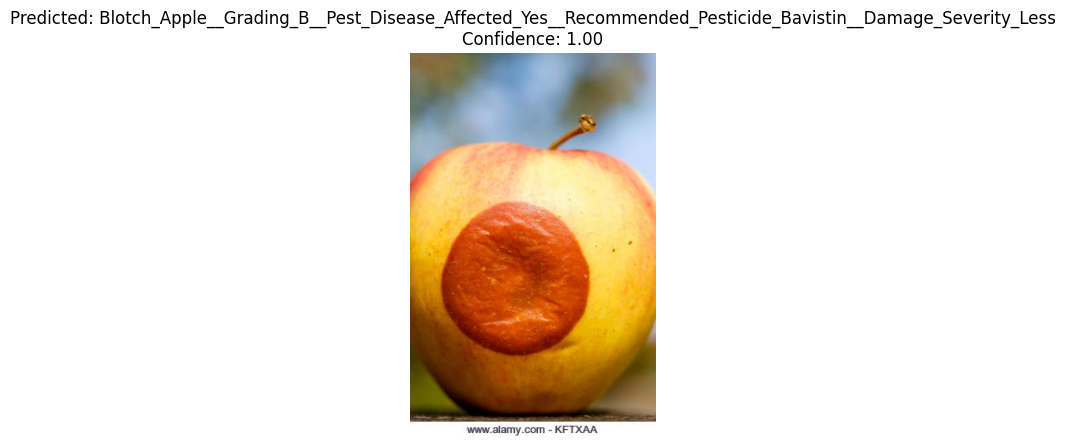

Image: 80.jpg, Predicted class: Blotch_Apple__Grading_B__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Less, Confidence: 1.00
Processing image: 99.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predictions for 99.jpg: [[0. 0. 1. 0.]]


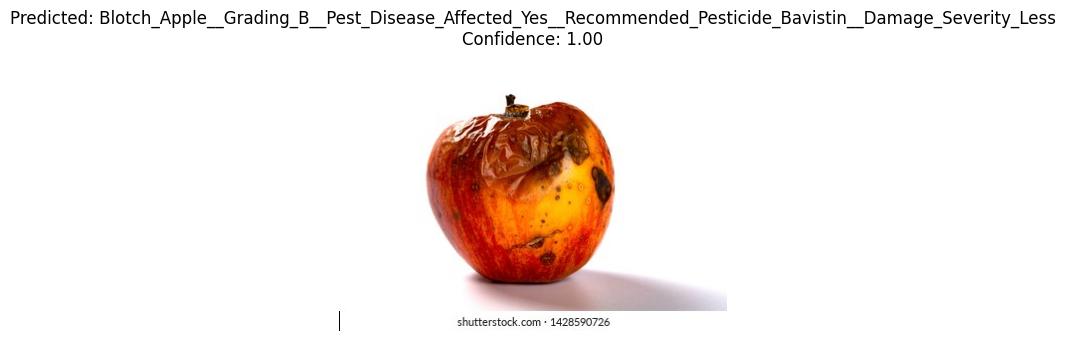

Image: 99.jpg, Predicted class: Blotch_Apple__Grading_B__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Less, Confidence: 1.00
Processed 10 images. Exiting.


In [14]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the saved model in the .keras format
model = load_model('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Apple-Disease-Detection/final_model.keras')

# Path to the directory where the images are located
image_dir = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Apple-Disease-Detection/data/Train'

# Define class names based on your model's training classes
class_names = [
    'Rot_Apple__Grading_C__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Moderate',
    'Scab_Apple__Grading_D__Pest_Disease_Affected_Yes__Recommended_Pesticide_Dithane_M45__Damage_Severity_High',
    'Blotch_Apple__Grading_B__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Less',
    'Healthy_Apple__Grading_A__Pest_Disease_Affected_No__Recommended_Pesticide_no need__Damage_Severity_Nil'
]

# Specify image file extensions
image_extensions = ['.jpg', '.jpeg', '.png']

# Counter to track how many images have been processed
image_counter = 0
max_images = 10  # Set the maximum number of images to process

# Loop through the subdirectories (class folders) in the directory
for class_folder in os.listdir(image_dir):
    class_path = os.path.join(image_dir, class_folder)

    # Check if it's a directory (subfolder containing images)
    if os.path.isdir(class_path):
        print(f"Processing folder: {class_folder}")

        # Loop through the images in this class folder
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)

            # Only process image files (skip non-image files)
            if os.path.isfile(img_path) and img_name.lower().endswith(tuple(image_extensions)):
                print(f"Processing image: {img_name}")  # Print the name of the image being processed

                # Load the image and resize it to the expected input size for the model
                img = load_img(img_path, target_size=(224, 224))  # Adjust target_size to match model input

                # Convert image to numpy array
                x = img_to_array(img)

                # Expand dimensions to match the model's expected input shape (batch size, height, width, channels)
                x = np.expand_dims(x, axis=0)

                # Stack images (if you have a batch of images, otherwise keep it as is)
                images = np.vstack([x])

                # Predict the class of the image
                predictions = model.predict(images)
                print(f"Predictions for {img_name}: {predictions}")  # Print raw predictions

                # Get the index of the predicted class
                predicted_class_idx = np.argmax(predictions)

                # Get the class name from the class names list
                predicted_class = class_names[predicted_class_idx]

                # Get the confidence score (the probability of the predicted class)
                confidence = np.max(predictions)

                # Visualization
                plt.figure(figsize=(5, 5))
                plt.imshow(load_img(img_path))  # Display the original image
                plt.axis('off')  # Turn off axes
                plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}", fontsize=12)
                plt.show()

                print(f"Image: {img_name}, Predicted class: {predicted_class}, Confidence: {confidence:.2f}")

                # Increment the counter
                image_counter += 1

                # Stop processing once we've predicted 10 images
                if image_counter >= max_images:
                    print("Processed 10 images. Exiting.")
                    break

        # Stop outer loop once 10 images have been processed
        if image_counter >= max_images:
            break


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step


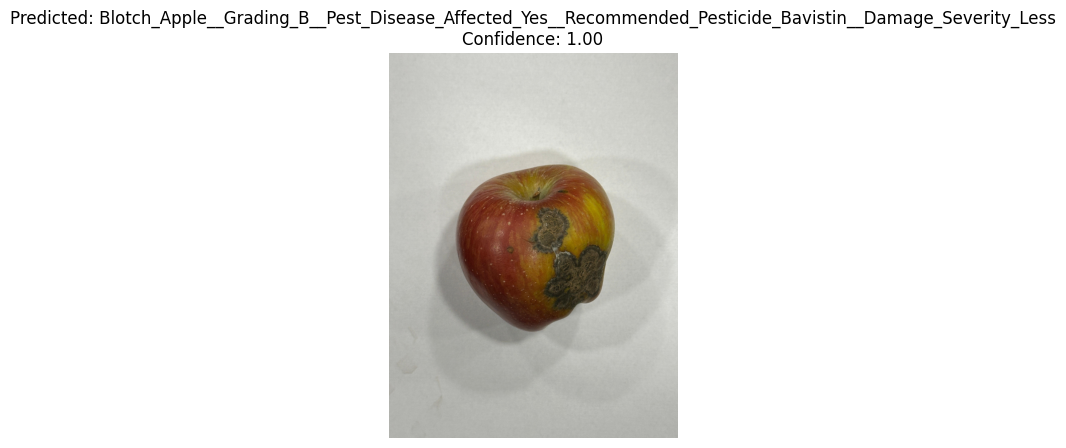

Predicted class: Blotch_Apple__Grading_B__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Less, Confidence: 1.00


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the saved model in the .keras format
model = load_model('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Apple-Disease-Detection/final_model.keras')

# Define class names based on your model's training classes
class_names = [
    'Rot_Apple__Grading_C__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Moderate',
    'Scab_Apple__Grading_D__Pest_Disease_Affected_Yes__Recommended_Pesticide_Dithane_M45__Damage_Severity_High',
    'Blotch_Apple__Grading_B__Pest_Disease_Affected_Yes__Recommended_Pesticide_Bavistin__Damage_Severity_Less',
    'Healthy_Apple__Grading_A__Pest_Disease_Affected_No__Recommended_Pesticide_no need__Damage_Severity_Nil'
]

# Specify the image path
img_path = '/content/drive/MyDrive/Colab Notebooks/Machine Learning/Apple-Disease-Detection/data/Test/Scab_Apple__Grading_D__Pest_Disease_Affected_Yes__Recommended_Pesticide_Dithane_M45__Damage_Severity_High/img333.jpg'  # Update with your image path

# Load the image and resize it to the expected input size for the model
img = load_img(img_path, target_size=(224, 224))  # Adjust target_size to match model input
# Convert image to numpy array
x = img_to_array(img)

# Expand dimensions to match the model's expected input shape (batch size, height, width, channels)
x = np.expand_dims(x, axis=0)

# Stack images (if you have a batch of images, otherwise keep it as is)
images = np.vstack([x])

# Predict the class of the image
predictions = model.predict(images)

# Get the index of the predicted class
predicted_class_idx = np.argmax(predictions)

# Get the class name from the class names list
predicted_class = class_names[predicted_class_idx]

# Get the confidence score (the probability of the predicted class)
confidence = np.max(predictions)

# Visualization
plt.figure(figsize=(5, 5))
plt.imshow(load_img(img_path))  # Display the original image
plt.axis('off')  # Turn off axes
plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}", fontsize=12)
plt.show()

# Print the result
print(f"Predicted class: {predicted_class}, Confidence: {confidence:.2f}")
